[*********************100%***********************]  1 of 1 completed
Date
2022-01-03           NaN
2022-01-04           NaN
2022-01-05           NaN
2022-01-06           NaN
2022-01-07           NaN
                 ...    
2022-12-23    144.131800
2022-12-27    143.964799
2022-12-28    143.637399
2022-12-29    143.354599
2022-12-30    143.075999
Name: Close, Length: 251, dtype: float64


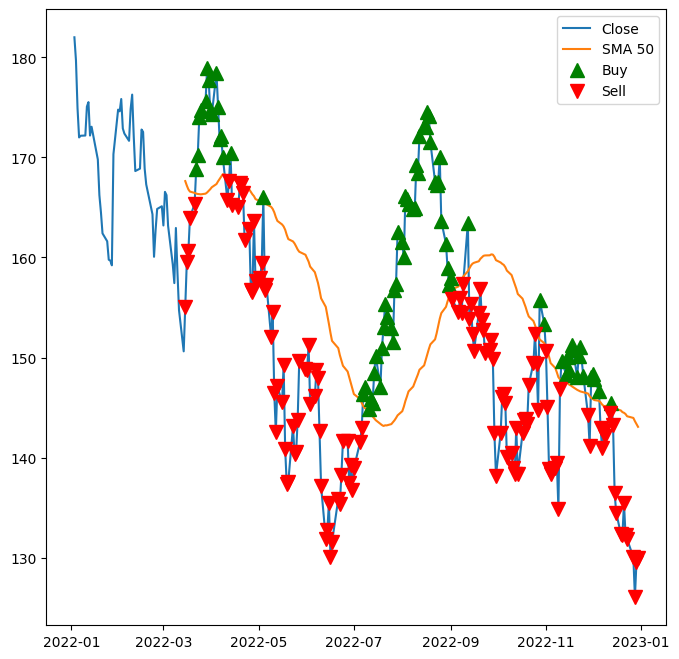

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# دانلود داده‌های تاریخی شرکت اپل
apple = yf.download("AAPL", start="2022-01-01", end="2022-12-31")

# محاسبه میانگین متحرک ۵۰ روزه
sma = apple["Close"].rolling(window=50).mean()
print(sma)

# محاسبه سیگنال خرید و فروش با استفاده از np.where
apple["Signal"] = np.where(apple["Close"] > sma, 1, np.where(apple["Close"] < sma, -1, 0))

# نمایش داده‌های تاریخی و سیگنال‌های تولید شده
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(apple["Close"], label="Close")
ax.plot(sma, label="SMA 50")
ax.plot(apple.loc[apple["Signal"] == 1].index, apple["Close"][apple["Signal"] == 1], "^", markersize=10, color="green", label="Buy")
ax.plot(apple.loc[apple["Signal"] == -1].index, apple["Close"][apple["Signal"] == -1], "v", markersize=10, color="red", label="Sell")
ax.legend()
plt.show()